In [43]:
import numpy as np
from mp_api.client import MPRester
from pymatgen.core.operations import SymmOp
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.phonon.plotter import PhononBSPlotter
from jupyter_jsmol.pymatgen import quick_view
from lmapr1492 import plot_brillouin_zone, get_plot_bs, get_plot_dos, get_plot_bs_and_dos, get_branch_wavevectors
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
mp_key = "5KTRCxoFyWvECvvRVCS0OeflSzkuO7df"
mp_id = "mp-7575"

In [8]:
with MPRester(mp_key) as m:
    prim_struc = m.get_structure_by_material_id(mp_id)
    el_bs = m.get_bandstructure_by_material_id(mp_id)
    el_dos = m.get_dos_by_material_id(mp_id)

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

## Bandes électroniques

In [104]:
print("Structure de bandes électroniques du matériau:")
fig_el_bs = get_plot_bs(el_bs, plot_range=[-4,7])
fig_el_bs.show()

Structure de bandes électroniques du matériau:


In [105]:
print("En comparaison avec la densité d'électrons: ")
fig_el_bs_and_dos = get_plot_bs_and_dos(el_bs, el_dos, plot_range=[-4,7])
fig_el_bs_and_dos.show()

En comparaison avec la densité d'électrons: 


## Bande interdite

Par la structure de bandes électroniques et la DOS, on voit qu'il existe une bande interdite de type directe. En effet, la densité d'électrons devient nulle pour certaines énergies. Cette bande interdite est directe car le maximum de la dernière bande de valence est situé juste en-dessous du minimum de la première bande de conduction. Voici les caractéristiques de cette bande interdite:

In [106]:
infos_gap = el_bs.get_band_gap()
if (infos_gap.get('direct')): 
    print("Type de la bande interdite : directe")
else:
    print("Type de la bande interdite : indirecte")
print("Energie de la bande interdite (eV): ", infos_gap.get('energy'))
print("Vecteur d'onde de transition : ", infos_gap.get('transition'))
print("On remarque que l'énergie de la bande interdite est relativement faible. Donc le matériau conduit plutôt bien l'électricité.")

Type de la bande interdite : directe
Energie de la bande interdite (eV):  0.5187000000000004
Vecteur d'onde de transition :  \Gamma-\Gamma
On remarque que l'énergie de la bande interdite est relativement faible. Donc le matériau conduit plutôt bien l'électricité.


## Dispersion

La dispersion d'une bande électronique correspond à la variation de l'énergie des électrons en fonction de leur vecteur d'onde. Plus la pente entre 2 points d'une bande sur la structure de bandes électroniques est grande en valeur absolue, plus la dispersion est élevée.

In [107]:
bsp = BSPlotter(el_bs)
dicti = bsp.bs_plot_data()
energies = dicti.get('energy')
distances = dicti.get('ticks').get('distance')

#supprimer les répétitions
distances = np.array([distances[0], distances[1], distances[3], distances[5], distances[7], distances[9], distances[11], distances[13], distances[15], distances[17], distances[18]])

#distances entre les points caractéristiques de l'axe des vecteurs d'onde de la structure de bandes électroniques
dist = np.zeros(10)
for i in range(len(distances) - 1):
    dist[i] = distances[i+1] - distances[i]

# différences d'énergie entre les points caractéristiques de l'axe des vecteurs d'onde de la structure de bandes électroniques (pour la dernière bande de valence)
dE_val = np.zeros(10)
for i in range(len(distances)-1):
    dE_val[i] =energies.get('1')[i][9][-1] - energies.get('1')[i][9][0]
    

# différences d'énergie entre les points caractéristiques de l'axe des vecteurs d'onde de la structure de bandes électroniques (pour la première bande de conduction)
    
dE_cond = np.zeros(10)
for i in range(len(distances)-1):
    dE_cond[i] =energies.get('1')[i][10][-1] - energies.get('1')[i][10][0]

#calcul des pentes

pentes_val = np.zeros(10)
pentes_cond = np.zeros(10)

for i in range (10):
    pentes_val[i] = np.abs(dE_val[i] / dist[i])
    pentes_cond[i] = np.abs(dE_cond[i] / dist[i])
    
#pentes (dispersion) minimale et maximale
max_val = np.max(pentes_val)
min_val = np.min(pentes_val)
max_cond = np.max(pentes_cond)
min_cond = np.min(pentes_cond)

index_max_val =np.argmax(pentes_val)
#print(index_max_val)
index_min_val =np.argmin(pentes_val)
#print(index_min_val)
index_max_cond =np.argmax(pentes_cond)
#print(index_max_cond)
index_min_cond =np.argmin(pentes_cond)
#print(index_min_cond)
print("Valeur de la dispersion maximale sur la dernière bande de valence (eV) : ", max_val, " sur le chemin Gamma - X.")
print("Valeur de la dispersion minimale sur la dernière bande de valence (eV) : ", min_val ," sur le chemin X - W.")
print("Valeur de la dispersion maximale sur la première bande de conduction (eV) : ", max_cond, " sur le chemin X - W.")
print("Valeur de la dispersion minimale sur la première bande de conduction (eV) : ", max_val, " sur le chemin L - U.")





Valeur de la dispersion maximale sur la dernière bande de valence (eV) :  2.031405046325047  sur le chemin Gamma - X.
Valeur de la dispersion minimale sur la dernière bande de valence (eV) :  0.3622907994451318  sur le chemin X - W.
Valeur de la dispersion maximale sur la première bande de conduction (eV) :  4.17797017764284  sur le chemin X - W.
Valeur de la dispersion minimale sur la première bande de conduction (eV) :  2.031405046325047  sur le chemin L - U.


Figure indiquant la dispersion par des flèches: 
La flèche rouge correspond à la dispersion maximale au niveau de la dernière bande de valence
La flèche bleue correspond à la dispersion minimale au niveau de la dernière bande de valence
La flèche verte correspond à la dispersion maximale au niveau de la première bande de conduction
La flèche verte correspond à la dispersion minimale au niveau de la première bande de conduction


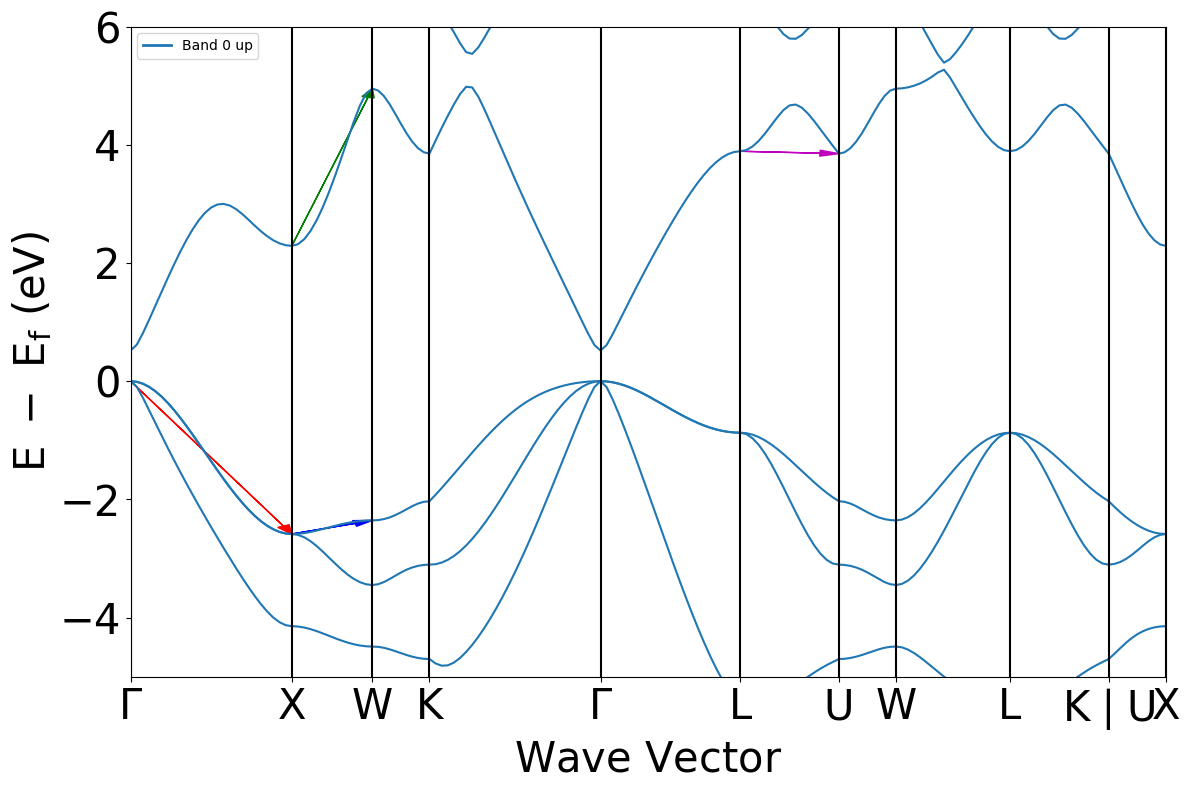

In [108]:
print("Figure indiquant la dispersion par des flèches: ")
bsp.get_plot(ylim = (-5, 6))
plt.arrow(distances[0], (energies.get('1')[0][9])[0], dist[0], dE_val[0], color = 'r', head_width = 0.1, length_includes_head=True)
plt.arrow(distances[1], (energies.get('1')[1][9])[0], dist[1], dE_val[1], color = 'b', head_width = 0.1, length_includes_head=True)
plt.arrow(distances[1], (energies.get('1')[1][10])[0], dist[1], dE_cond[1], color = 'g', head_width = 0.1, length_includes_head=True)
plt.arrow(distances[5], (energies.get('1')[5][10])[0], dist[5], dE_cond[5], color = 'm', head_width = 0.1, length_includes_head=True)

print("La flèche rouge correspond à la dispersion maximale au niveau de la dernière bande de valence")
print("La flèche bleue correspond à la dispersion minimale au niveau de la dernière bande de valence")
print("La flèche verte correspond à la dispersion maximale au niveau de la première bande de conduction")
print("La flèche verte correspond à la dispersion minimale au niveau de la première bande de conduction")




## Masse effective

En considérant une relation de dispersion parabolique pour l'énergie, on a $E(k) = \frac{\hbar² k²}{2m*}$. Donc on peut isoler la masse effective des électrons: $m* = \frac{\hbar² k²}{2E}$. La relation liant l'énergie au vecteur d'onde dans le cas des éléctrons libres peut aussi être utilisée dans le cas d'électrons soumis à un potentiel, moyennant le changement de masse effective. Plus un électron a une masse effective faible, plus la courbure de sa bande dans la structure de bandes électroniques sera grande.

In [109]:
print("Pour la dernière bande de valence: ")
h_barre = 1.0545718*10**-34
E_val = el_bs.get_vbm().get('energy')
print("Energie au maximum de la bande (eV): ", E_val)
norm_val = np.linalg.norm(el_bs.get_vbm().get('kpoint').frac_coords)
print("Norme du vecteur d'onde: ", norm_val)
print("Masse effective des électrons au sommet de la dernière bande de valence (kg): ", ((h_barre**2)*(norm_val**2))/2*E_val, "\n")


Pour la dernière bande de valence: 
Energie au maximum de la bande (eV):  3.1226
Norme du vecteur d'onde:  0.0
Masse effective des électrons au sommet de la dernière bande de valence (kg):  0.0 



In [110]:
print("Pour la première bande de conduction: ")

E_cond = el_bs.get_cbm().get('energy')
print("Energie au minimum de la bande (eV): ", E_cond)
norm_cond = np.linalg.norm(el_bs.get_cbm().get('kpoint').frac_coords)
print("Norme du vecteur d'onde: ", norm_cond)
print("Masse effective des électrons à la base de la première bande de conduction (kg): ", ((h_barre**2)*(norm_cond**2))/2*E_val, "\n")


Pour la première bande de conduction: 
Energie au minimum de la bande (eV):  3.6413
Norme du vecteur d'onde:  0.0
Masse effective des électrons à la base de la première bande de conduction (kg):  0.0 

